In [14]:
import tensorflow as tf

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from subprocess import check_output

In [16]:
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Размерность тренировочного и тестового наборов

Проверяем количество строк и столбцов, чтобы понять, сколько изображений и признаков мы имеем.


In [17]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [18]:
train_y = train['label'].astype('float32')
train_x = train.drop(['label'],axis = 1).astype('int32')
test_x = test.astype('float32')
train_x.shape, train_y.shape, test_x.shape

((42000, 784), (42000,), (28000, 784))

In [19]:
train_x = train_x.values.reshape(-1,28,28,1)
train_x = train_x / 255.0
test_x = test_x.values.reshape(-1,28,28,1)
test_x = test_x / 255.0
train_x.shape, test_x.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

In [20]:
train_y = tf.keras.utils.to_categorical(train_y,10)
train_y.shape

(42000, 10)

In [21]:
print(train['label'].head())

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64


In [22]:
print(train_y[0:5,:])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Архитектура модели

Создаем сверточную нейронную сеть (`CNN`) с несколькими слоями `Conv2D`, `MaxPooling2D`, `Dropout`, `Flatten` и `Dense`. Эта архитектура хорошо подходит для распознавания рукописных цифр.


In [23]:
#Defining the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(28,28,1)),
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  #tf.keras.layers.Dropout(0.50),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.50),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

C:\Users\qwqw\PycharmProjects\pythonProject\pythonProject1\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 6, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 354,922 (1.35 MB)

 Trainable params: 354,922 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy') > 0.999):
                print("\nReached 99.9% accuracy so cancelling training!")
                self.model.stop_training = True
    
callbacks = myCallback()

In [25]:
Optimizer = tf.keras.optimizers.Adam(
            learning_rate=0.0005, 
            beta_1=0.9, 
            beta_2=0.999, 
            epsilon=1e-07,
            name='Adam'
)
model.compile(optimizer=Optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, batch_size = 50, epochs = 20, callbacks=[callbacks])

Epoch 1/20
840/840 ━━━━━━━━━━━━━━━━━━━━ 162s 155ms/step - accuracy: 0.7330 - loss: 0.7594
Epoch 2/20
840/840 ━━━━━━━━━━━━━━━━━━━━ 143s 169ms/step - accuracy: 0.9753 - loss: 0.0867
Epoch 3/20
840/840 ━━━━━━━━━━━━━━━━━━━━ 141s 168ms/step - accuracy: 0.9832 - loss: 0.0623
Epoch 4/20
840/840 ━━━━━━━━━━━━━━━━━━━━ 139s 166ms/step - accuracy: 0.9858 - loss: 0.0464
Epoch 5/20
840/840 ━━━━━━━━━━━━━━━━━━━━ 138s 165ms/step - accuracy: 0.9873 - loss: 0.0433
Epoch 6/20
840/840 ━━━━━━━━━━━━━━━━━━━━ 138s 164ms/step - accuracy: 0.9892 - loss: 0.0373
Epoch 7/20
840/840 ━━━━━━━━━━━━━━━━━━━━ 140s 166ms/step - accuracy: 0.9917 - loss: 0.0267
Epoch 8/20
840/840 ━━━━━━━━━━━━━━━━━━━━ 139s 166ms/step - accuracy: 0.9932 - loss: 0.0249
Epoch 9/20
840/840 ━━━━━━━━━━━━━━━━━━━━ 138s 164ms/step - accuracy: 0.9924 - loss: 0.0242
Epoch 10/20
840/840 ━━━━━━━━━━━━━━━━━━━━ 138s 164ms/step - accuracy: 0.9942 - loss: 0.0186
Epoch 11/20
840/840 ━━━━━━━━━━━━━━━━━━━━ 134s 160ms/step - accuracy: 0.9938 - loss: 0.0189
Epoch 12

Компиляция и обучение модели

Компилируем модель с оптимизатором `Adam`, функцией потерь `categorical_crossentropy` и метрикой `accuracy`. Обучаем модель в течение 20 эпох.


In [32]:
model.save("digit_model.h5")

In [26]:
results = model.predict(test_x)

results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

875/875 ━━━━━━━━━━━━━━━━━━━━ 59s 66ms/step


Генерация предсказаний

Используем обученную модель для предсказания классов на тестовом наборе. Результат сохраняем в формате `Series`.


✅ Модель успешно загружена.
875/875 ━━━━━━━━━━━━━━━━━━━━ 56s 63ms/step


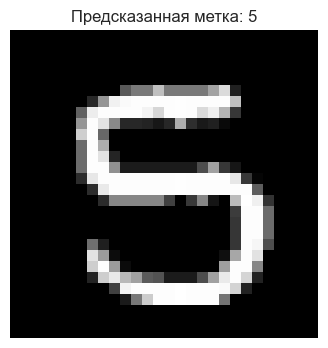

In [33]:
model = tf.keras.models.load_model("digit_model.h5")
print("Модель успешно загружена.")

# Предсказания
results = model.predict(test_x)
results = np.argmax(results, axis=1)
results = pd.Series(results, name="Label")

index = random.randint(0, len(test_x) - 1)
image = test_x[index].reshape(28, 28)
predicted_label = results[index]

plt.figure(figsize=(4, 4))
plt.imshow(image, cmap='gray')
plt.title(f"Предсказанная метка: {predicted_label}")
plt.axis('off')
plt.show()